# MLP on the MNIST Dataset

Trains three simple NNs with 3 hidden layers on the MNIST dataset.

Gets to 90.8% validation accuracy after 20 epochs (mean squared loss) (Residual Connection), 90.3% (MLP)

Gets to 94.63% validation accuracy after 100 epochs (mean squared loss) (Residual Connection & MLP)

Gets to 97.08% validation accuracy after 100 epochs (cross-entropy loss)

(there is *a lot* of margin for parameter tuning).

~2 seconds per epoch on a GTX1070 GPU.


## Import Tensorflow package (for Keras) and the MNIST dataset

In [1]:
from __future__ import print_function

# import keras
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.optimizers import RMSprop
# from keras import regularizers

import tensorflow as tf

batch_size = 512
num_classes = 10
epochs = 100

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


# The First Model (Residual Connection)

## Model Setup

Input -> Fully Connected (2048) -> ReLU -> Fully Connected (784) -> Add Input -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (10) -> Mean squared loss

In [2]:
# model
x1 = tf.keras.layers.Input(shape=(784,))
a1 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(x1)
a2 = tf.keras.layers.Dense(784, activation='relu', use_bias=True)(a1)
a2 = tf.keras.layers.Add()([a2, x1])
a3 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(a2)
y_mlp = tf.keras.layers.Dense(num_classes, activation=None, use_bias=True)(a3)
#y_mlp = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(a3)

model = tf.keras.models.Model(inputs=x1, outputs=y_mlp)

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2048)         1607680     input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 784)          1606416     dense_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 784)          0           dense_2[0][0]                    
                                                                 input_1[0][0]                    
__________

## Fit the Model using Back Propagation (Vanilla SGD)

In [3]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#print('Test error:', 1-score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================]60000/60000 [==============================] - 3s 44us/step - loss: 0.0870 - acc: 0.4204 - val_loss: 0.0690 - val_acc: 0.6125

Epoch 2/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0626 - acc: 0.6787 - val_loss: 0.0576 - val_acc: 0.7323

Epoch 3/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0548 - acc: 0.7554 - val_loss: 0.0520 - val_acc: 0.7835

Epoch 4/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0504 - acc: 0.7927 - val_loss: 0.0484 - val_acc: 0.8091

Epoch 5/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0474 - acc: 0.8155 - val_loss: 0.0458 - val_acc: 0.8292

Epoch 6/100
60000/60000 [==========

60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0204 - acc: 0.9434 - val_loss: 0.0205 - val_acc: 0.9409

Epoch 90/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 20us/step - loss: 0.0203 - acc: 0.9439 - val_loss: 0.0204 - val_acc: 0.9413

Epoch 91/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0202 - acc: 0.9441 - val_loss: 0.0204 - val_acc: 0.9416

Epoch 92/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0201 - acc: 0.9443 - val_loss: 0.0203 - val_acc: 0.9425

Epoch 93/100
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0201 - acc: 0.9446 - val_loss: 0.0202 - val_acc: 0.9428

Epoch 94/100
60000/60000 [==============================]60000/60000 [=======================

## Loss and Accuracy Plots

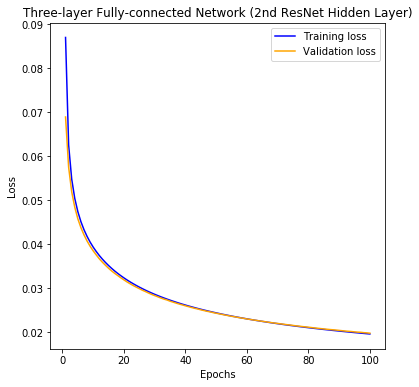

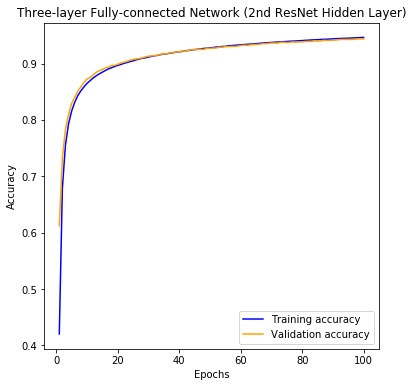

In [4]:
# Plot of Losses
import matplotlib.pyplot as plt

history_dict = history.history
# history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs_index = range(1,len(loss_values)+1)

fig_loss = plt.figure(figsize=(6, 6))
plt.plot(epochs_index, loss_values, 'b', label='Training loss')
plt.plot(epochs_index, val_loss_values, 'b', c='orange', label='Validation loss')
plt.title('Three-layer Fully-connected Network (2nd ResNet Hidden Layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#%%
# Plot of Accuracies
plt.clf()
fig_accuracy = plt.figure(figsize=(6, 6))
plt.plot(epochs_index,acc_values,'b', label='Training accuracy')
plt.plot(epochs_index,val_acc_values,'b', c='orange', label='Validation accuracy')
plt.title('Three-layer Fully-connected Network (2nd ResNet Hidden Layer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Save the Plots

In [5]:
fig_accuracy.savefig('fig_accuracy.eps', format='eps', dpi=2000)

# The Second Model (MLP)

## Model Setup

Input -> Fully Connected (2048) -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (10) -> Mean squared loss

In [6]:
# model
x0 = tf.keras.layers.Input(shape=(784,))
u1 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(x0)
u2 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(u1)
u3 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(u2)
y_mlp_2 = tf.keras.layers.Dense(num_classes, activation=None, use_bias=True)(u3)
#y_mlp = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01))(a3)

model_2 = tf.keras.models.Model(inputs=x0, outputs=y_mlp_2)

model_2.summary()

model_2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20490     
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________


## Fit the Model using Back Propagation (Vanilla SGD)

In [7]:
history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_2 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])
#print('Test error:', 1-score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.0835 - acc: 0.3639 - val_loss: 0.0718 - val_acc: 0.5928

Epoch 2/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0661 - acc: 0.6659 - val_loss: 0.0600 - val_acc: 0.7398

Epoch 3/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0571 - acc: 0.7549 - val_loss: 0.0532 - val_acc: 0.7891

Epoch 4/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0516 - acc: 0.7929 - val_loss: 0.0487 - val_acc: 0.8185

Epoch 5/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0479 - acc: 0.8157 - val_loss: 0.0456 - val_acc: 0.8372

Epoch 6/100
60000/60000 [==========

60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0187 - acc: 0.9456 - val_loss: 0.0185 - val_acc: 0.9481

Epoch 90/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0187 - acc: 0.9459 - val_loss: 0.0184 - val_acc: 0.9484

Epoch 91/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 28us/step - loss: 0.0186 - acc: 0.9462 - val_loss: 0.0184 - val_acc: 0.9485

Epoch 92/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0185 - acc: 0.9463 - val_loss: 0.0183 - val_acc: 0.9486

Epoch 93/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 27us/step - loss: 0.0185 - acc: 0.9467 - val_loss: 0.0183 - val_acc: 0.9484

Epoch 94/100
60000/60000 [==============================]60000/60000 [=======================

## Loss and Accuracy Plots

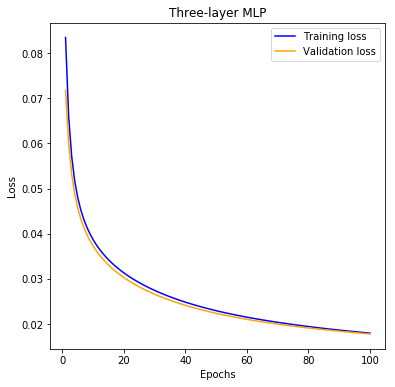

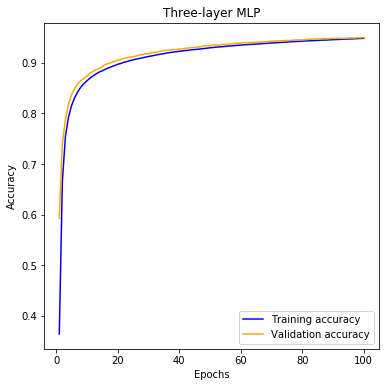

In [8]:
# Plot of Losses
import matplotlib.pyplot as plt

history_dict_2 = history_2.history
# history_dict.keys()
loss_values_2 = history_dict_2['loss']
val_loss_values_2 = history_dict_2['val_loss']
acc_values_2 = history_dict_2['acc']
val_acc_values_2 = history_dict_2['val_acc']

epochs_index = range(1,len(loss_values)+1)
fig_loss_2 = plt.figure(figsize=(6, 6))
plt.plot(epochs_index, loss_values_2, 'b', label='Training loss')
plt.plot(epochs_index, val_loss_values_2, 'b', c='orange', label='Validation loss')
plt.title('Three-layer MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#%%
# Plot of Accuracies
plt.clf()
fig_accuracy_2 = plt.figure(figsize=(6, 6))
plt.plot(epochs_index,acc_values_2,'b', label='Training accuracy')
plt.plot(epochs_index,val_acc_values_2,'b', c='orange', label='Validation accuracy')
plt.title('Three-layer MLP')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Save the Plots

In [9]:
fig_accuracy_2.savefig('fig_accuracy_2.eps', format='eps', dpi=2000)

# The Third Model (MLP) (Cross-entropy Loss)

Input -> Fully Connected (2048) -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (2048) -> ReLU -> Fully Connected (10) -> Softmax -> Cross-entropy loss

In [10]:
# model
z0 = tf.keras.layers.Input(shape=(784,))
z1 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(z0)
z2 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(z1)
z3 = tf.keras.layers.Dense(2048, activation='relu', use_bias=True)(z2)
#y_mlp_2 = tf.keras.layers.Dense(num_classes, activation=None, use_bias=True)(z3)
y_mlp_3 = tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_regularizer=None)(z3)

model_3 = tf.keras.models.Model(inputs=z0, outputs=y_mlp_3)

model_3.summary()

model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_11 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20490     
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Fit the Model using Back Propagation (Vanilla SGD)

In [11]:
history_3 = model_3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])
#print('Test error:', 1-score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 35us/step - loss: 1.8861 - acc: 0.6125 - val_loss: 1.3859 - val_acc: 0.7808

Epoch 2/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 1.0316 - acc: 0.8178 - val_loss: 0.7320 - val_acc: 0.8476

Epoch 3/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.6350 - acc: 0.8589 - val_loss: 0.5206 - val_acc: 0.8782

Epoch 4/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.4930 - acc: 0.8793 - val_loss: 0.4303 - val_acc: 0.8923

Epoch 5/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.4238 - acc: 0.8913 - val_loss: 0.3822 - val_acc: 0.9005

Epoch 6/100
60000/60000 [==========

60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.0836 - acc: 0.9771 - val_loss: 0.1026 - val_acc: 0.9693

Epoch 90/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.0826 - acc: 0.9774 - val_loss: 0.1010 - val_acc: 0.9699

Epoch 91/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.0817 - acc: 0.9777 - val_loss: 0.1008 - val_acc: 0.9695

Epoch 92/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.0807 - acc: 0.9782 - val_loss: 0.0989 - val_acc: 0.9700

Epoch 93/100
60000/60000 [==============================]60000/60000 [==============================] - 2s 31us/step - loss: 0.0798 - acc: 0.9782 - val_loss: 0.0994 - val_acc: 0.9698

Epoch 94/100
60000/60000 [==============================]60000/60000 [=======================

## Loss and Accuracy Plots

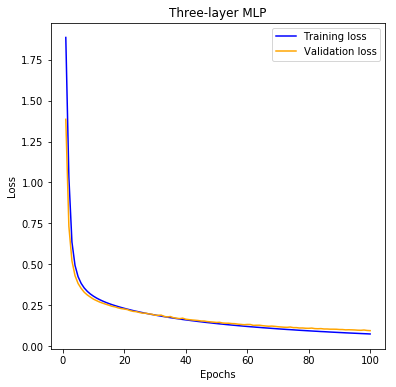

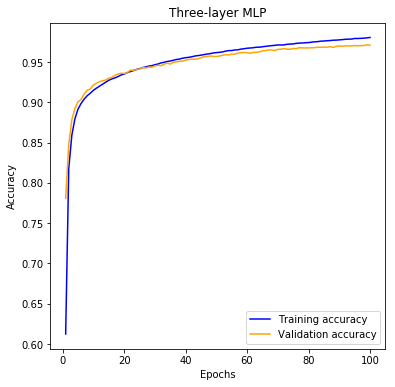

In [12]:
# Plot of Losses
history_dict_3 = history_3.history
# history_dict.keys()
loss_values_3 = history_dict_3['loss']
val_loss_values_3 = history_dict_3['val_loss']
acc_values_3 = history_dict_3['acc']
val_acc_values_3 = history_dict_3['val_acc']

epochs_index = range(1,len(loss_values_3)+1)
fig_loss_3 = plt.figure(figsize=(6, 6))
plt.plot(epochs_index, loss_values_3, 'b', label='Training loss')
plt.plot(epochs_index, val_loss_values_3, 'b', c='orange', label='Validation loss')
plt.title('Three-layer MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



#%%
# Plot of Accuracies
plt.clf()
fig_accuracy_3 = plt.figure(figsize=(6, 6))
plt.plot(epochs_index,acc_values_3,'b', label='Training accuracy')
plt.plot(epochs_index,val_acc_values_3,'b', c='orange', label='Validation accuracy')
plt.title('Three-layer MLP')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Save the Plots

In [13]:
fig_accuracy_3.savefig('fig_accuracy_3.eps', format='eps', dpi=2000)